In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os as dir
from mpl_toolkits.mplot3d import Axes3D

In [7]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10.0, 10.0)

#Setting the directory 
dir.getcwd()
dir.chdir('C:/Users/sushv/Desktop/Job/Moloco')

In [12]:
#Importing the data 
df = pd.read_csv('Adops & Data Scientist Sample Data_Regression.csv',header= None)
df.columns = ['A','B','C']

In [13]:
#Checking for any missing values
df.isnull().values.any()

False

There are no Missing Values in the data 

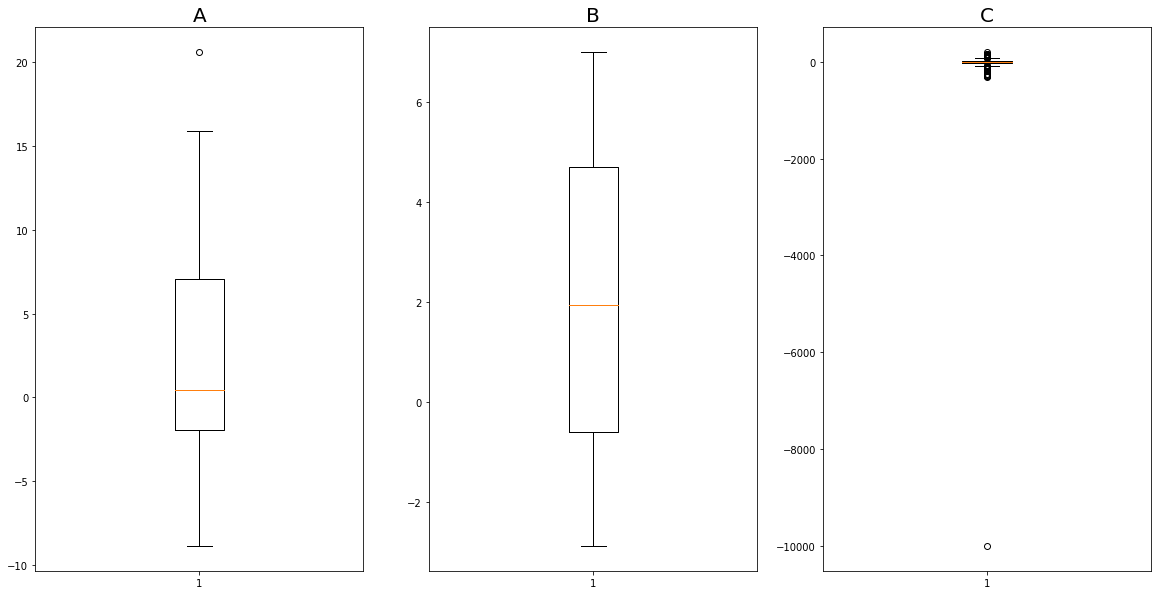

In [14]:

# Data Distribution
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.boxplot(df.A)
plt.title('A',fontsize=20)
plt.subplot(1, 3, 2)
plt.boxplot(df.B)
plt.title('B',fontsize=20)
plt.subplot(1, 3, 3)
plt.boxplot(df.C)
plt.title('C',fontsize=20)
plt.show()

Text(0.5, 0, '$C$')

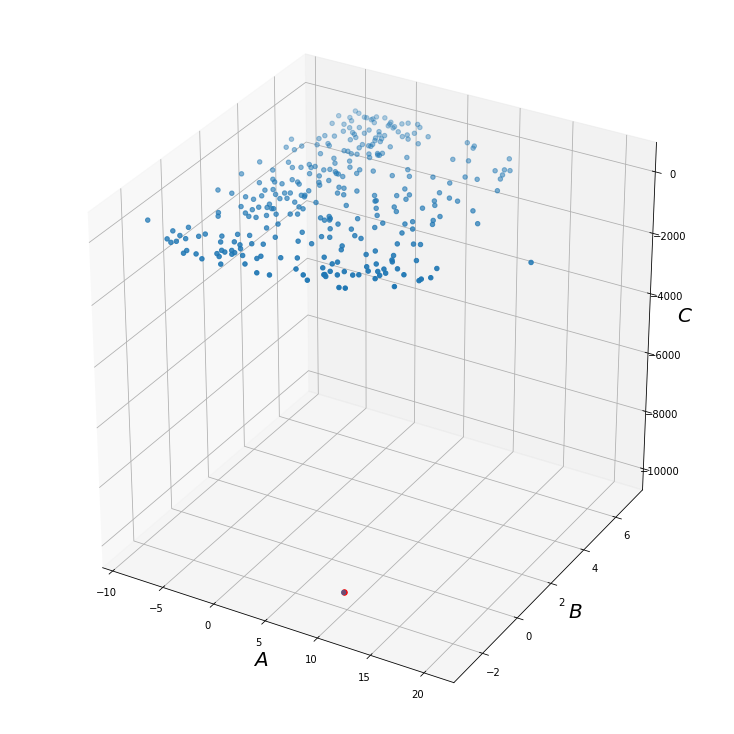

In [15]:
# 3D Visualizations
A = df.A.values
B = df.B.values
C = df.C.values

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(A,B,C)
ax.scatter(A[200],B[200],C[200],color = "red", s = 30)
ax.set_xlabel('$A$', fontsize=20)
ax.set_ylabel('$B$', fontsize=20)
ax.set_zlabel('$C$', fontsize=20)

It shows a outlier marked in red. As there are very minor amount of outliers in the data, i have decided to remove them


In [16]:
# Removing the outliers
df_clean = df[df.C != df.C.min()]

Text(0.5, 0, '$C$')

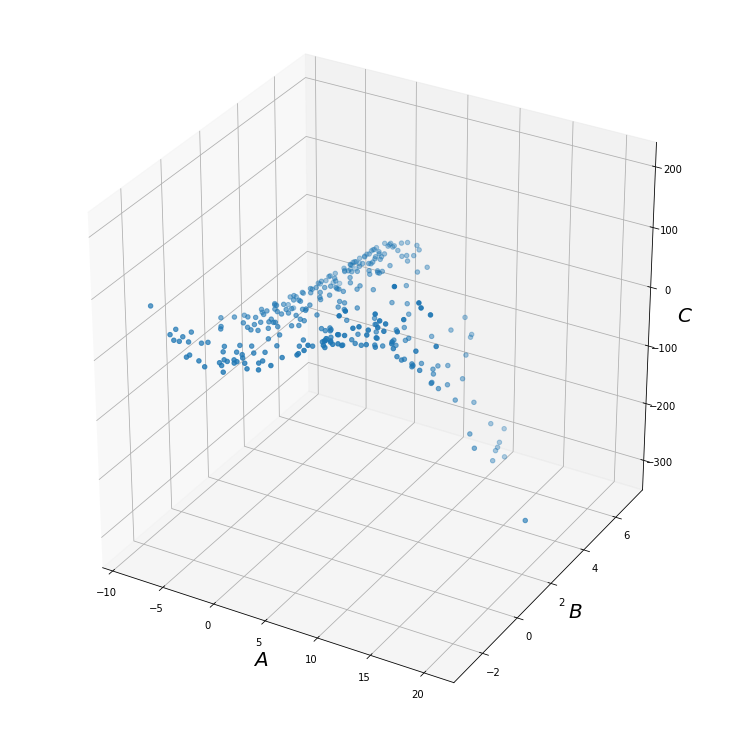

In [17]:
#Plotting the data after removing the outliers
A = df_clean.A.values
B = df_clean.B.values
C = df_clean.C.values

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(A,B,C)
ax.set_xlabel('$A$', fontsize=20)
ax.set_ylabel('$B$', fontsize=20)
ax.set_zlabel('$C$', fontsize=20)

In [19]:
 """Building a Linear Regression Model. In this, the idea is to find the optimal beta values - coefficients of the model
 which will help in minimizing the cost function. 
 
 The optimization is performed by using the Gradient Descent. It calculates the optimal beta values by using 
 the learning rate and editing the values in every iteration"""
    
    
    """X, Y in the Linear Regression are the independent and dependent variables (In the array or matrix forms). Beta values are the 
coefficients of the linear combination --> Y=beta0+ beta1 * X1 + beta2*X2..."""

def costFunction(X,y,beta):
    squared_residuals = np.power((X@beta.T-y),2)
    sum_squared_residuals = np.sum(squared_residuals)
    n = len(X)
    J = sum_squared_residuals/(2*n)
    return J

"""Using the Gradient Descent to minimize the above cost function. In this also we take X, Y as the dependent and the response
variables. alpha is the learning rate of the Gradient Descent algorithm"""
def gradientDescent(X, y, beta, n, alpha):
    cost = np.zeros(n) # initial costs are 0
    for i in range(n):
        beta = beta - (alpha/len(X)) * np.sum(X * (X @ beta.T - y), axis = 0) # iteratively update beta
        cost[i] = costFunction(X, y, beta) # update cost 
    return beta, cost

In [20]:
# Create matrices 
X = df_clean.iloc[:,0:2] # get A and B
ones = np.ones([X.shape[0],1]) # constant
X = np.concatenate((ones,X),axis=1) # combine constant with explanatory variables

y = df_clean.iloc[:,2:3].values # get C
beta = np.zeros([1,3]) # initialize betas with 0

# set hyper_parameters
alpha = 0.01 # learning rate
n = 1000 # number of iterations

In [21]:
b, cost = gradientDescent(X, y , beta, n, alpha)
print(b)

[[ 25.62827002  -1.36092271 -15.20575852]]


Text(0, 0.5, 'Cost')

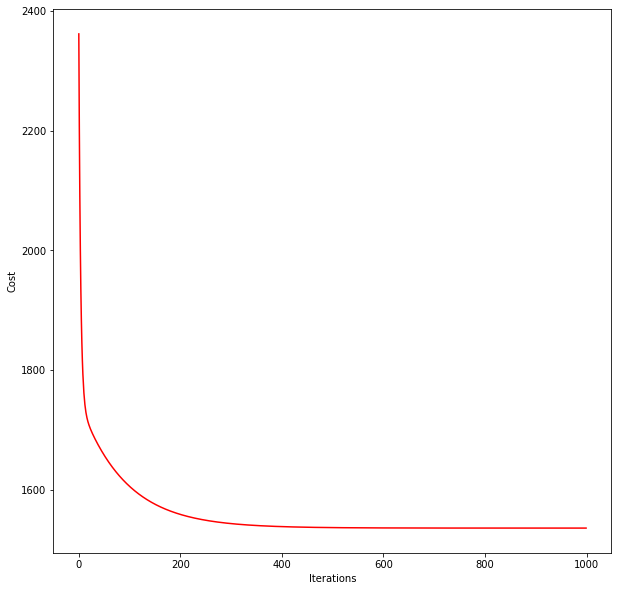

In [22]:
fig, ax = plt.subplots()
ax.plot(np.arange(n),cost, 'r')
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')

In [23]:
"""Model Evaluation - MSE and R2 values for used for the model evaluation process"""

"""Computing the MSE- Mean Squared Error Metric for evaluation. It takes the predicted value and the response 
variable values as the input and returns the mean squared error value """
def rmse(y, y_pred):
    rmse = np.sqrt(sum((y - y_pred) ** 2) / len(y))
    return rmse.item()

"""Computing the R squared Metric for evaluation. This explains the variability explained by the current model.
It takes the predicted value and the response 
variable values as the input and returns the R squared """
def r2_score(y, y_pred):
    mean_y = np.mean(y)
    sst = sum((y - mean_y) ** 2)
    sse = sum((y - y_pred) ** 2)
    r2 = 1 - (sse / sst)
    return r2.item()


In [24]:
y_pred = X.dot(b.T) # get estimated y
RMSE = rmse(y,y_pred)
print('RMSE is',RMSE)
r2 = r2_score(y,y_pred)
print('R2 score is',r2)

RMSE is 55.42734296679078
R2 score is 0.3940209976851361


In [ ]:
""" The R2 value seems low. Looking deeply into the graphs, we see that the data is not repesented with a flat surface,
which makes us try polynomial values in the model

So, i am adding A2 term in the model and checking the evaluation"""

In [25]:

# Create matrices 
X = df_clean.iloc[:,0:2] # get A and B
X['A'] = (X['A'] - X['A'].mean())/(X['A'].std()) # standardize
X['A2'] = X['A']**2 # add quadratic term
ones = np.ones([X.shape[0],1]) # constant
X = np.concatenate((ones,X),axis=1) # combine constant with explanatory variables

beta = np.zeros([1,4]) # initilize beta, change the size because add new variable

In [26]:
b, cost = gradientDescent(X, y , beta, n, alpha)
print(b)

[[ 31.70213486  -2.8089481  -15.43532625  -9.08358036]]


In [27]:

y_pred = X.dot(b.T) # get estimated y
RMSE = rmse(y,y_pred)
print('RMSE is',RMSE)
r2 = r2_score(y,y_pred)
print('R2 score is',r2)

RMSE is 54.51977152437136
R2 score is 0.4137032191080714


We see some improvement in the R2 value after the adding the polynomial term !